In [100]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
# configure matplotlib to output inline
%matplotlib inline


In [2]:

sourcedata=pd.read_csv('aggregate_covid_country.csv')
sourcedata

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [3]:
sourcedata.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [4]:
# Country Wise Count
sourcedata_by_Country = pd.DataFrame(sourcedata).groupby('Country').sum()
sourcedata_by_Country=sourcedata_by_Country.sort_values(by=['Confirmed'], ascending=False)
sourcedata_by_Country

,Confirmed,Recovered,Deaths
Country,,,
US,57098767,8428678,3221969
Italy,11896347,4354815,1568276
Spain,11890691,5770271,1302010
United Kingdom,9150537,43829,1329006
Germany,9046257,6102898,319666
...,...,...,...
Bhutan,608,209,0
MS Zaandam,512,0,112
Papua New Guinea,359,184,0


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


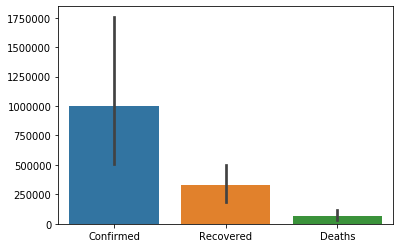

In [5]:
sns.barplot( data=sourcedata_by_Country)

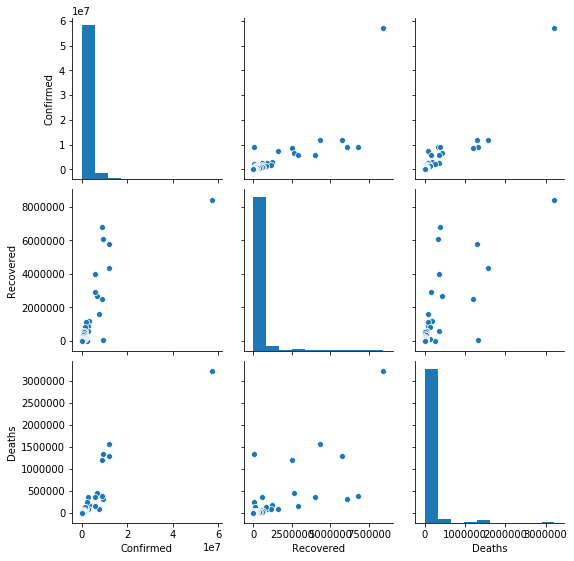

In [6]:
sns.pairplot(sourcedata_by_Country)

In [90]:
# Country Wise Count
#sourcedata.groupby('Country', as_index=False).agg({"Confirmed": "sum","Recovered": "sum","Deaths": "sum"})
sourcedata_by_Country = pd.DataFrame(sourcedata).groupby(['Country'], as_index=False).sum()
sourcedata_by_Country

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,185236,20845,4669
1,Albania,41253,25688,1629
2,Algeria,240070,107345,23232
3,Andorra,41573,20751,2219
4,Angola,1892,506,131
...,...,...,...,...
183,West Bank and Gaza,19971,8798,113
184,Western Sahara,307,186,1
185,Yemen,2696,92,460
186,Zambia,15285,5281,215


In [91]:
sourcedata_by_Country.keys()

Index(['Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

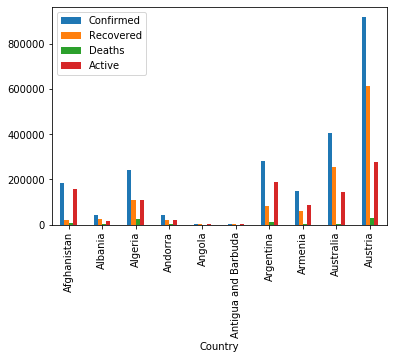

In [95]:
#Top 10 Countries with Confirmed

sourcedata_by_Country.head(10).plot.bar(x="Country")

In [97]:
# Active Cases 
sourcedata_by_Country['Active']=sourcedata_by_Country['Confirmed']-(sourcedata_by_Country['Recovered']+sourcedata_by_Country['Deaths'])

In [98]:
sourcedata_by_Country

,Country,Confirmed,Recovered,Deaths,Active
0,Afghanistan,185236,20845,4669,159722
1,Albania,41253,25688,1629,13936
2,Algeria,240070,107345,23232,109493
3,Andorra,41573,20751,2219,18603
4,Angola,1892,506,131,1255
...,...,...,...,...,...
183,West Bank and Gaza,19971,8798,113,11060
184,Western Sahara,307,186,1,120
185,Yemen,2696,92,460,2144
186,Zambia,15285,5281,215,9789


In [103]:
sourcedata_by_Country['EffectedRatio']=(sourcedata_by_Country['Active']/sourcedata_by_Country['Confirmed'])*100

In [104]:
sourcedata_by_Country['EffectedRatio']

0      86.226220
1      33.781786
2      45.608781
3      44.747793
4      66.331924
         ...    
183    55.380301
184    39.087948
185    79.525223
186    64.043180
187    67.500000
Name: EffectedRatio, Length: 188, dtype: float64

In [105]:
sourcedata_by_Country.keys()

Index(['Country', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'EffectedRatio'],
      dtype='object')

In [111]:
# handling catagorical variables
sourcedata_by_Country = pd.get_dummies(sourcedata_by_Country, columns = ['Country'], drop_first = True)

In [113]:
x=sourcedata_by_Country.iloc[:,0:-1]
x.shape

(188, 191)

In [114]:

y = sourcedata_by_Country[['EffectedRatio']]

print(y.shape)

(188, 1)


In [115]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [116]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [117]:
y_pred = regressor.predict(X_test)

In [118]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

3.4622307918939154e-05

In [123]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df

,Actual,Predicted
0,55.380301,55.380303
1,77.473723,77.473712
2,65.315852,65.315853
3,71.346079,71.346091
4,79.614761,79.614762
5,92.018489,92.018487
6,66.571290,66.571291
7,83.964524,83.964522
8,61.703231,61.703187
9,93.851551,93.851548
